<a href="https://colab.research.google.com/github/nihar6697/Task7/blob/main/Task7_1_DataPreprocessing_Assignment11_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Data.csv

**Step 1: Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


**Step 2: Importing dataset**

In [ ]:
df = pd.read_csv("/content/Data.csv")
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


**Step 3: Handling the missing data**

In [ ]:
df.shape

(10, 4)

In [ ]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
df.isnull().mean()*100
#missing value in age and salary coloumn is above 5% so cant remove mising value.we hv to impute the data

Country       0.0
Age          10.0
Salary       10.0
Purchased     0.0
dtype: float64

In [ ]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Salary"].fillna(df["Salary"].mean(),inplace=True)


In [ ]:
df.isnull().sum()

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64

In [ ]:
#mean_age = df["Age"].mean()
#mean_Salary = df["Salary"].mean()


In [ ]:
#df["Age_mean"] = df["Age"].fillna(mean_age)
#df["Salary_mean"] = df["Salary"].fillna(mean_Salary)

In [ ]:
#df

In [ ]:
#df.cov()

,Age,Salary,Age_mean,Salary_mean
Age,59.194444,9.867857e+04,59.194444,8.611883e+04
Salary,98678.571429,1.504444e+08,86118.827160,1.504444e+08
Age_mean,59.194444,8.611883e+04,52.617284,7.655007e+04
Salary_mean,86118.827160,1.504444e+08,76550.068587,1.337284e+08


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


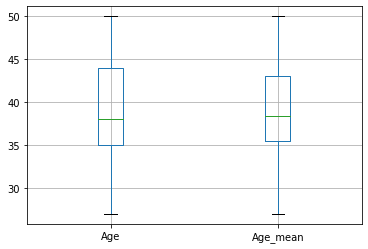

In [ ]:
#df[["Age","Age_mean"]].boxplot()

**Step 4: Encoding categorical data**

In [ ]:
df.Purchased = df.Purchased.map({'No': 0, 'Yes': 1})


In [ ]:
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,0
1,Spain,27.000000,48000.000000,1
2,Germany,30.000000,54000.000000,0
3,Spain,38.000000,61000.000000,0
4,Germany,40.000000,63777.777778,1
5,France,35.000000,58000.000000,1
6,Spain,38.777778,52000.000000,0
7,France,48.000000,79000.000000,1
8,Germany,50.000000,83000.000000,0
9,France,37.000000,67000.000000,1


**Step 5: Creating a dummy variable**

In [ ]:
df = pd.get_dummies(df, columns = ["Country"])

In [ ]:
df

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.000000,0,1,0,0
1,27.000000,48000.000000,1,0,0,1
2,30.000000,54000.000000,0,0,1,0
3,38.000000,61000.000000,0,0,0,1
4,40.000000,63777.777778,1,0,1,0
5,35.000000,58000.000000,1,1,0,0
6,38.777778,52000.000000,0,0,0,1
7,48.000000,79000.000000,1,1,0,0
8,50.000000,83000.000000,0,0,1,0
9,37.000000,67000.000000,1,1,0,0


**Step 6: Splitting the datasets into training sets and Test sets**

In [ ]:
X = df[['Age', 'Salary', 'Country_France', 'Country_Germany', 'Country_Spain']].values 
y = df['Purchased'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Step 7: Feature Scaling**

In [ ]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.26306757,  0.12381479, -1.        ,  2.64575131, -0.77459667],
       [-0.25350148,  0.46175632,  1.        , -0.37796447, -0.77459667],
       [-1.97539832, -1.53093341, -1.        , -0.37796447,  1.29099445],
       [ 0.05261351, -1.11141978, -1.        , -0.37796447,  1.29099445],
       [ 1.64058505,  1.7202972 ,  1.        , -0.37796447, -0.77459667],
       [-0.0813118 , -0.16751412, -1.        , -0.37796447,  1.29099445],
       [ 0.95182631,  0.98614835,  1.        , -0.37796447, -0.77459667],
       [-0.59788085, -0.48214934,  1.        , -0.37796447, -0.77459667]])

In [ ]:
X_test_scaled

array([[-1.45882927, -0.90166297, -1.        ,  2.64575131, -0.77459667],
       [ 1.98496442,  2.13981082, -1.        ,  2.64575131, -0.77459667]])